## Import

In [1]:
import os, sys
workpath = sys.path[0]
#print (workpath)

import random as r
import numpy as np
import matplotlib.pyplot as plt
from shutil import copyfile

from bdd_prs import *

list_of_class = ["CUBO","DEC","FCC","FCC-sphere","HCP-sphere","ICO","MnBeta-sphere","OH","RTD","BCC","DODECA"]
Nclass = len(list_of_class)

## Fonctions distributions

In [3]:
def distrib_BDD (BDDpath , result = True):
    """Renvoie la répartition des classes dans la BDD 
    Entrée : chemin vers la BDD , result=True pour afficher les résultats ; 
    Sortie : si result=False, renvoie distribution en %, noms des fichier et nb fichier"""
    
    BDDcontent = os.listdir(BDDpath)
    distrib = np.zeros (Nclass , dtype = int)
    Nbimg = len(BDDcontent)
    
    for img in BDDcontent:
        classID = int ( img[:3] ) - 1
        distrib[classID] += 1
    
    if result == True:
        distrib = (distrib/Nbimg)*100
        plt.figure(figsize = (15,2))
        plt.bar(range(Nclass),distrib, align='center', tick_label = list_of_class)
        plt.ylabel('Part %')
        plt.xlabel('Class')
        plt.title('Distrib')
        plt.show()
        for i in range(Nclass):
            print ( f'Part of {list_of_class[i]} in BDD = {distrib[i]} %\n') 
    
    else:
        return distrib , BDDcontent , Nbimg

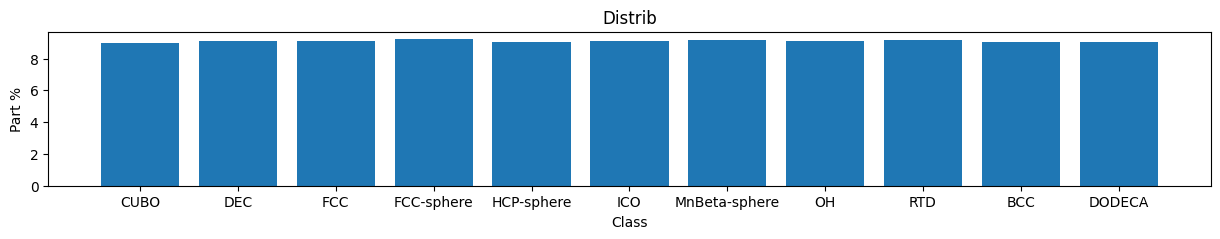

Part of CUBO in BDD = 8.975 %

Part of DEC in BDD = 9.105 %

Part of FCC in BDD = 9.075 %

Part of FCC-sphere in BDD = 9.225 %

Part of HCP-sphere in BDD = 9.045 %

Part of ICO in BDD = 9.095 %

Part of MnBeta-sphere in BDD = 9.155000000000001 %

Part of OH in BDD = 9.085 %

Part of RTD in BDD = 9.15 %

Part of BCC in BDD = 9.06 %

Part of DODECA in BDD = 9.030000000000001 %



In [3]:
def equalize_BDD(BDDpath):
    """Egalise la répartition en classe
    Entrée : chemin BDD;
    Sortie : None, création BDD égalisé dans le même fichier que la BDD source"""
    
    distrib , BDDcontent , Nbimg = distrib_BDD(BDDpath,result = False)
    New_distrib = np.ones ( Nclass,dtype = int ) * (min(distrib))
    fill_track  = np.zeros( Nclass,dtype = int ) 
    banned_class = []
    
    def check():
        '''return class that do not need to be added to new BDD'''
        for c in range(Nclass):
            if c not in banned_class and fill_track[c] >= New_distrib[c] :
                banned_class.append(c)
    
    BDDname = str.split(BDDpath,'\\')[-1]
    newBDDname = f'{BDDname}(equalized)'
    
    if not os.path.exists(f'{workpath}\{newBDDname}'):
        os.mkdir(f'{workpath}\{newBDDname}')
    
    if len(os.listdir(f'{workpath}\{newBDDname}')) == 0:
        
        ImgRemoved = 0
        while len(banned_class) < Nclass:
            check()
            random_index = r.randrange(0 , Nbimg - ImgRemoved)
            ID  = int(BDDcontent[random_index][:3]) - 1
            
            if ID not in banned_class:
                img = BDDcontent[random_index]
                copyfile ( f'{BDDpath}\{img}' , f'{workpath}\{newBDDname}\{img}')
            
                BDDcontent.pop(random_index)
                ImgRemoved += 1
                fill_track[ID] += 1
                 
        augmente_BDD (f'{workpath}\{newBDDname}' , True , Nbimg - len(os.listdir(f'{workpath}\{newBDDname}')))

In [4]:
def custom_BDD(BDDpath):
    """Crée une BDD avec une distribution précise
    Entrée : chemin BDD;
    Sortie : None, création BDD dans le même fichier que la BDD source"""
    
    prop = np.zeros ( Nclass , dtype = np.float16)
    newBDDname = input('Nom de la BDD :')
    ok_carac = ['0','1','2','3','4','5','6','7','8','9','.']
    for i in range (Nclass):
        p = input(f'Proportion (%) en {list_of_class[i]} : ')
        for c in p:
            if c not in ok_carac:
                print('Saisie invalide : erreur format des proportions')
                custom_BDD(BDDpath)
        prop[i] = float(p)
    prop = prop/100
    if not(0.99 <= sum(prop) <= 1.01):
        print ('Saisie invalide : erreur somme des proportions')
        custom_BDD(BDDpath)
        
    if not os.path.exists(f'{workpath}\{newBDDname}'):
        os.mkdir(f'{workpath}\{newBDDname}')
        
    if len(os.listdir(f'{workpath}\{newBDDname}')) == 0:
    
        distrib , BDDcontent , N = distrib_BDD(BDDpath,result = False)
        BDDcontent = sorted(BDDcontent)
        m = 0
        BDDcontent_class = []
        for i in range(Nclass):
            BDDcontent_class.append(BDDcontent[m : m + distrib[i]])
            m += distrib[i]
    
        for k in range(Nclass):
            if round(N*prop[k]) >= distrib[k]:
                for img_name in BDDcontent_class[k]:
                    copyfile (f'{BDDpath}\{img_name}' , f'{workpath}\{newBDDname}\{img_name}')
                id2exclude = np.delete ( np.arange(1,Nclass+1) , k )
                augmente_BDD ( f'{workpath}\{newBDDname}' , True , round(N*prop[k]) - distrib[k] , id2exclude)
            
            else:
                stock = BDDcontent_class[k][:]
                i = 0
                while i< N*prop[k]:
                    random_index = r.randrange(0 , round(N*prop[k]) - i)
                    img_name = stock[random_index]
                    copyfile (f'{BDDpath}\{img_name}', f'{workpath}\{newBDDname}\{img_name}')
                    stock.pop(random_index)
                    i = i+1